In [1]:
# Pacote para trabalhar com JSON
import json

# Pacote para realizar requisições HTTP
import requests

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

In [2]:
df_data_1 = pd.read_csv("./data/algar-dataset-treino.csv")
df_data_1.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,...,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,...,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,...,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,...,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,...,80,3,12,3,2,1,0,0,0,Não


In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [19]:
desc = df_data_1.describe()
desc.iloc[:,0:10]

,Idade,Pontuação teste,Distancia casa-trabalho,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego
count,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,37.030657,807.249635,9.105109,1.0,1012.276642,2.729927,65.807299,2.745985,2.081752,2.723358
std,9.196528,404.400662,7.992457,0.0,569.946647,1.091863,20.389902,0.706643,1.113974,1.107829
min,18.000000,102.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000
25%,30.000000,465.250000,2.000000,1.0,516.250000,2.000000,48.000000,2.000000,1.000000,2.000000
50%,36.000000,806.000000,7.000000,1.0,1014.500000,3.000000,66.000000,3.000000,2.000000,3.000000
75%,43.000000,1168.750000,14.000000,1.0,1512.000000,4.000000,83.000000,3.000000,3.000000,4.000000
max,60.000000,1499.000000,29.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000


In [22]:
desc.iloc[:,10:20]

,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia
count,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000
mean,6572.754745,14296.439416,2.703650,1.0,15.174453,3.150365,2.720438,80.0,0.804380,11.357664
std,4755.773452,7122.797449,2.499333,0.0,3.629208,0.357559,1.079704,0.0,0.851919,7.849234
min,1009.000000,2094.000000,0.000000,1.0,11.000000,3.000000,1.000000,80.0,0.000000,0.000000
25%,2932.250000,8009.750000,1.000000,1.0,12.000000,3.000000,2.000000,80.0,0.000000,6.000000
50%,4955.000000,14225.500000,2.000000,1.0,14.000000,3.000000,3.000000,80.0,1.000000,10.000000
75%,8437.500000,20456.250000,4.000000,1.0,18.000000,3.000000,4.000000,80.0,1.000000,15.000000
max,19999.000000,26999.000000,9.000000,1.0,25.000000,4.000000,4.000000,80.0,3.000000,40.000000


In [23]:
desc.iloc[:,20:30]

,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,2.800730,2.769343,7.031387,4.244526,2.206569,4.141606
std,1.282745,0.704319,6.127907,3.617897,3.220930,3.578049
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

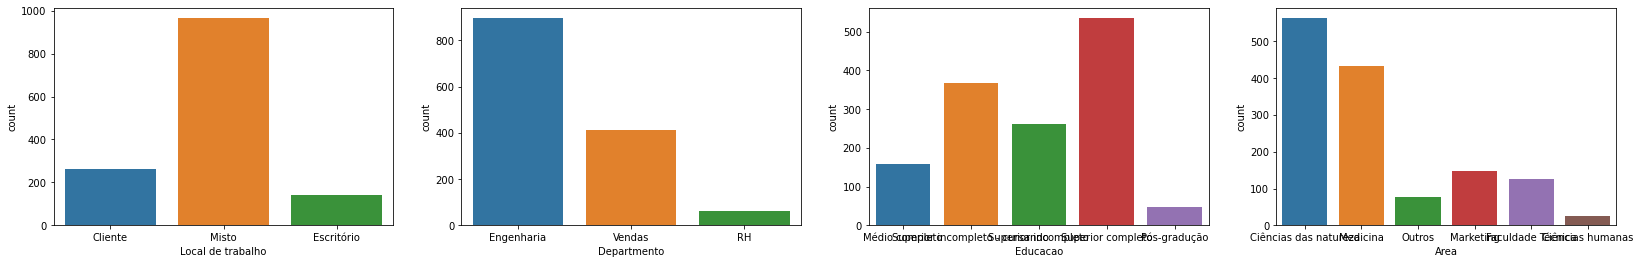

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='Local de trabalho', data=df_data_1)
sns.countplot(ax=axes[1], x='Departmento', data=df_data_1)
sns.countplot(ax=axes[2], x='Educacao', data=df_data_1)
sns.countplot(ax=axes[3], x='Area', data=df_data_1)

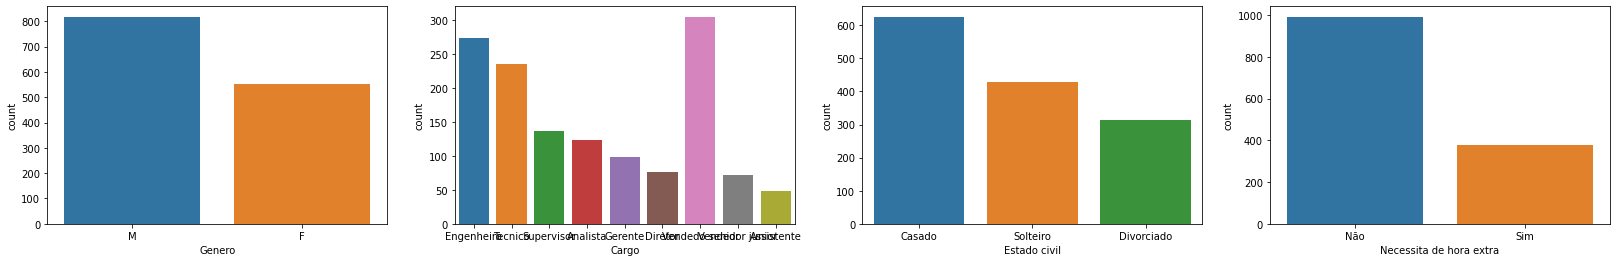

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='Genero', data=df_data_1)
sns.countplot(ax=axes[1], x='Cargo', data=df_data_1)
sns.countplot(ax=axes[2], x='Estado civil', data=df_data_1)
sns.countplot(ax=axes[3], x='Necessita de hora extra', data=df_data_1)

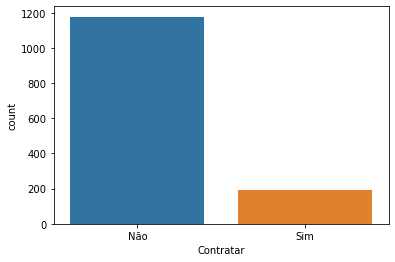

In [28]:
fig = plt.plot()
sns.countplot(x='Contratar', data=df_data_1)

In [3]:
# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split
# Método para criação de modelos baseados em árvores de decisão
from sklearn.tree import DecisionTreeClassifier
# Classe para a criação de uma pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold

from sklearn.metrics import accuracy_score


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')

In [16]:
# Instanciando uma transformação DropColumns
rm_columns = DropColumns(
    columns=["Possui carro", "Maior de idade", "Horas de trabalho padrão"]  # Essa transformação recebe como parâmetro uma lista com os nomes das colunas indesejadas
)

rm_columns.fit(X=df_data_1)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_data_1
    ),
)

In [18]:
from sklearn.preprocessing import LabelEncoder

def changeCategorical(X, column):
    le = LabelEncoder()
    le.fit(X[column])
    X[column+'_cat'] = le.transform(X[column])

In [19]:
for c in df_data_1.select_dtypes(include='object').columns:
    changeCategorical(df_data_2, c)

In [20]:
df_data_2.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,...,Contratar,Local de trabalho_cat,Departmento_cat,Educacao_cat,Area_cat,Genero_cat,Cargo_cat,Estado civil_cat,Necessita de hora extra_cat,Contratar_cat
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,2,3,M,...,Não,0,0,0,0,1,3,0,0,0
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,5,4,F,...,Não,2,0,4,0,0,3,0,1,0
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,7,1,M,...,Não,0,0,0,4,1,6,0,0,0
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,8,4,M,...,Não,2,0,3,0,1,6,2,0,0
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,10,3,F,...,Não,2,0,2,4,0,6,0,1,0


In [21]:
# Definição das colunas que serão features (nota-se que a coluna NOME não está presente)
features = [
        'Idade', 'Local de trabalho_cat', 'Pontuação teste', 'Departmento_cat',
       'Distancia casa-trabalho', 'Educacao_cat', 'Area_cat', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Genero_cat',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo_cat',
       'Satisfação com emprego', 'Estado civil_cat', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Necessita de hora extra_cat', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência'
]

# Definição da variável-alvo
target = ["Contratar"]

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X = df_data_2[features]
y = df_data_2[target]

In [22]:
def print_results(results):
    media = results['test_score'].mean()
    dp = results['test_score'].std()
    
    print('Accuracy = %.2f' % (media * 100))
    print('Accuracy = [%.2f, %.2f]' % ((media - 2 * dp)*100, (media + 2 * dp)*100))

In [29]:
from sklearn.model_selection import StratifiedKFold

SEED = 337
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 15, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
results = cross_validate(model, X, y, cv = cv)
print_results(results)

Accuracy = 86.79
Accuracy = [81.97, 91.62]
